<a href="https://colab.research.google.com/github/hankapy/Data-analytiikkaa-Pythonilla/blob/main/Kopio_frekvenssijakauma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-02-08 / Aki Taanila


## Yhdistäminen Google-driveen

Ennen seuraavan solun koodin suoritusta sinun täytyy varmistaa että olet luonut Google-driveesi kansion, jonka nimenä on **data**.

Seuraavan solun koodilla voit yhdistää Colabin oman Google-driven data-kansioon. Tämän jälkeen voit helposti avata data-kansioon tallentamiasi datoja.

In [ ]:
# Yhdistäminen Google driveen
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


# Frekvenssijakauma

Kategorisen muuttujan frekvenssijakauman esitän frekvenssitaulukkona tai pylväskaaviona.

Frekvenssitaulukolla tarkoitan taulukkoa, joka sisältää muuttujan arvojen esiintymiskerrat (frekvenssit) ja esiintymiskertojen prosenttiosuudet.

Seuraavassa yksi tapa frekvenssitaulukon ja pylväskaavion laatimiseen.

In [ ]:
import pandas as pd

# Grafiikka-paketit
import matplotlib.pyplot as plt
import seaborn as sns

# Tyylimääritys grafiikalle
sns.set_style('white')

Jos datan avaaminen antaa virheilmoituksen, niin data-kansion kytkeminen Colabiin ei ole onnistunut tai data1.xlsx-tiedostoa ei ole data-kansiossa.

Voit vaihtoehtoisesti avata tiedoston netistä komennolla `df = pd.read_excel('https://taanila.fi/data1.xlsx')`

In [ ]:
df = pd.read_excel('data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [ ]:
# Koulutuksen numeroarvoja [1, 2, 3, 4] vastaavat tekstimuotoiset arvot listana
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [ ]:
# Frekvenssit crosstab-funktiolla
# Frekvenssi-sarakkeen otsikkona käytän f-kirjainta
df1 = pd.crosstab(df['koulutus'], columns='f')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Tekstimuotoiset arvot numeroiden tilalle
df1.index = koulutus

# Prosentit
n = df1['f'].sum()
df1['%'] = (df1['f']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Tyylimäärittely: f-sarake ilman desimaaleja, %-sarakkeeseen yksi desimaali
df1.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %
Yhteensä,81,100.0 %


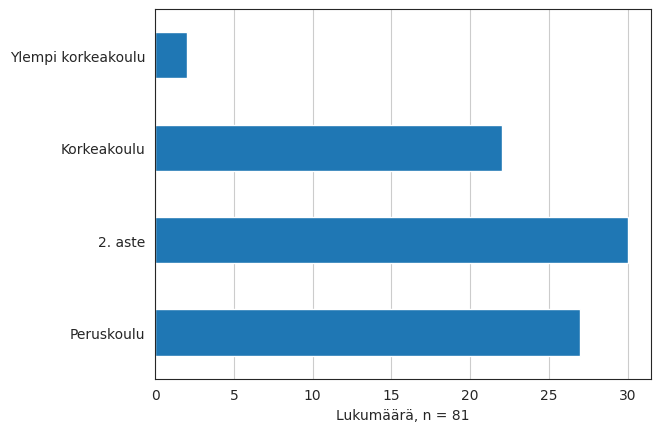

In [ ]:
# Vaakapylväskaavio lukumääristä. Yhteensä-rivin tietoja en ota mukaan.
df1.drop('Yhteensä')['f'].plot(kind='barh')

# x-akselin otsikko (n-arvo laskettu edellisessä solussa)
plt.xlabel(f'Lukumäärä, n = {n}')

# x-akselilta lähtevä taustaviivoitus
plt.grid(axis='x')

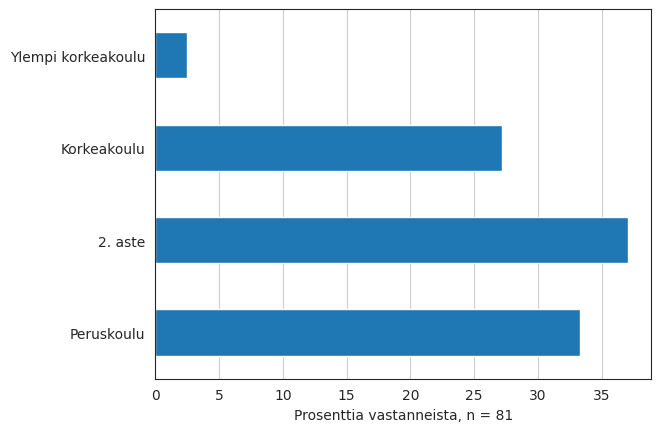

In [ ]:
# Vaakapylväskaavio prosenteista
df1.drop('Yhteensä')['%'].plot(kind='barh')

plt.xlabel(f'Prosenttia vastanneista, n = {n}')
plt.grid(axis='x')

## Lisätietoa

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

Data-analytiikka Pythonilla https://tilastoapu.wordpress.com/python/